In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport
from pathlib import Path


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
df = pd.read_csv("2.a.Detail_Incident.csv", parse_dates=['Open_Time', 'Resolved_Time','Close_Time'])

In [4]:
df.dtypes

CI_Name_aff                           object
CI_Type_aff                           object
CI_Subtype_aff                        object
Service_Component_WBS_aff             object
Incident_ID                           object
Impact                                 int64
Urgency                                int64
Priority                               int64
KM_number                             object
Count_Reassignments                  float64
Open_Time                     datetime64[ns]
Resolved_Time                 datetime64[ns]
Close_Time                    datetime64[ns]
Handle_Time_Hours                    float64
Closure_Code                          object
Count_Related_Interactions           float64
Related_Interaction                   object
Count_Related_Incidents              float64
Count_Related_Changes                float64
Related_Change                        object
CI_Name_CBy                           object
CI_Type_CBy                           object
CI_Subtype

In [5]:
df.head()

,CI_Name_aff,CI_Type_aff,CI_Subtype_aff,Service_Component_WBS_aff,Incident_ID,Impact,Urgency,Priority,KM_number,Count_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_Hours,Closure_Code,Count_Related_Interactions,Related_Interaction,Count_Related_Incidents,Count_Related_Changes,Related_Change,CI_Name_CBy,CI_Type_CBy,CI_Subtype_CBy,ServiceComp_WBS_CBy,ReopenedFlag
0,APP000005,application,Citrix,WBS000292,IM0001224,4,4,4,KM0001060,0.0,2013-10-01 07:33:21,2013-10-01 08:36:09,2013-10-01 08:37:28,1.068611,Software,1.0,SD0001630,0.0,0.0,Not Applicable,APP000005,application,Citrix,WBS000292,0
1,DSK000457,computer,Desktop,WBS000187,IM0001226,5,5,5,KM0001446,2.0,2013-10-01 08:18:38,2013-10-07 11:51:53,2013-10-07 11:52:00,45.556111,Hardware,1.0,SD0001635,0.0,0.0,Not Applicable,DSK000457,computer,Desktop,WBS000187,0
2,SBA000263,application,Server Based Application,WBS000072,IM0001229,5,5,5,KM0000644,12.0,2013-10-01 08:36:09,2013-10-07 16:55:08,2013-10-07 16:55:38,50.324722,Other,1.0,SD0001644,0.0,0.0,Not Applicable,#N/B,#N/B,#N/B,#N/B,0
3,SBA000154,application,Server Based Application,WBS000027,IM0001230,5,5,5,KM0001291,1.0,2013-10-01 08:39:37,2013-10-01 15:39:47,2013-10-01 15:39:51,7.003889,Other,1.0,SD0001640,0.0,0.0,Not Applicable,SBA000154,application,Server Based Application,WBS000027,0
4,LAP000019,computer,Laptop,WBS000091,IM0001231,5,5,5,KM0000315,0.0,2013-10-01 08:40:00,2013-10-02 11:30:13,2013-10-02 11:30:19,0.020278,Other,1.0,SD0001638,0.0,0.0,Not Applicable,KYB000001,hardware,Keyboard,WBS000091,0


In [6]:
df['TimeToResolve'] = df.Resolved_Time - df.Open_Time

In [7]:
df.TimeToResolve.describe()

count                      35208
mean      3 days 16:21:45.273148
std      10 days 08:24:08.475153
min              0 days 00:00:17
25%       0 days 01:12:33.250000
50%       0 days 16:20:28.500000
75%       3 days 02:57:33.500000
max            175 days 06:40:30
Name: TimeToResolve, dtype: object

In [8]:
df.TimeToResolve.mode()

0   00:08:22
dtype: timedelta64[ns]

In [9]:
df.head()

,CI_Name_aff,CI_Type_aff,CI_Subtype_aff,Service_Component_WBS_aff,Incident_ID,Impact,Urgency,Priority,KM_number,Count_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_Hours,Closure_Code,Count_Related_Interactions,Related_Interaction,Count_Related_Incidents,Count_Related_Changes,Related_Change,CI_Name_CBy,CI_Type_CBy,CI_Subtype_CBy,ServiceComp_WBS_CBy,ReopenedFlag,TimeToResolve
0,APP000005,application,Citrix,WBS000292,IM0001224,4,4,4,KM0001060,0.0,2013-10-01 07:33:21,2013-10-01 08:36:09,2013-10-01 08:37:28,1.068611,Software,1.0,SD0001630,0.0,0.0,Not Applicable,APP000005,application,Citrix,WBS000292,0,0 days 01:02:48
1,DSK000457,computer,Desktop,WBS000187,IM0001226,5,5,5,KM0001446,2.0,2013-10-01 08:18:38,2013-10-07 11:51:53,2013-10-07 11:52:00,45.556111,Hardware,1.0,SD0001635,0.0,0.0,Not Applicable,DSK000457,computer,Desktop,WBS000187,0,6 days 03:33:15
2,SBA000263,application,Server Based Application,WBS000072,IM0001229,5,5,5,KM0000644,12.0,2013-10-01 08:36:09,2013-10-07 16:55:08,2013-10-07 16:55:38,50.324722,Other,1.0,SD0001644,0.0,0.0,Not Applicable,#N/B,#N/B,#N/B,#N/B,0,6 days 08:18:59
3,SBA000154,application,Server Based Application,WBS000027,IM0001230,5,5,5,KM0001291,1.0,2013-10-01 08:39:37,2013-10-01 15:39:47,2013-10-01 15:39:51,7.003889,Other,1.0,SD0001640,0.0,0.0,Not Applicable,SBA000154,application,Server Based Application,WBS000027,0,0 days 07:00:10
4,LAP000019,computer,Laptop,WBS000091,IM0001231,5,5,5,KM0000315,0.0,2013-10-01 08:40:00,2013-10-02 11:30:13,2013-10-02 11:30:19,0.020278,Other,1.0,SD0001638,0.0,0.0,Not Applicable,KYB000001,hardware,Keyboard,WBS000091,0,1 days 02:50:13


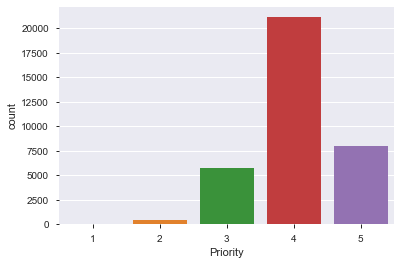

In [10]:
sns.countplot(x='Priority', data=df)

In [11]:
df['TimeToResolve_Minutes'] = df.TimeToResolve.dt.total_seconds() / 60

In [12]:
df.head()

,CI_Name_aff,CI_Type_aff,CI_Subtype_aff,Service_Component_WBS_aff,Incident_ID,Impact,Urgency,Priority,KM_number,Count_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_Hours,Closure_Code,Count_Related_Interactions,Related_Interaction,Count_Related_Incidents,Count_Related_Changes,Related_Change,CI_Name_CBy,CI_Type_CBy,CI_Subtype_CBy,ServiceComp_WBS_CBy,ReopenedFlag,TimeToResolve,TimeToResolve_Minutes
0,APP000005,application,Citrix,WBS000292,IM0001224,4,4,4,KM0001060,0.0,2013-10-01 07:33:21,2013-10-01 08:36:09,2013-10-01 08:37:28,1.068611,Software,1.0,SD0001630,0.0,0.0,Not Applicable,APP000005,application,Citrix,WBS000292,0,0 days 01:02:48,62.800000
1,DSK000457,computer,Desktop,WBS000187,IM0001226,5,5,5,KM0001446,2.0,2013-10-01 08:18:38,2013-10-07 11:51:53,2013-10-07 11:52:00,45.556111,Hardware,1.0,SD0001635,0.0,0.0,Not Applicable,DSK000457,computer,Desktop,WBS000187,0,6 days 03:33:15,8853.250000
2,SBA000263,application,Server Based Application,WBS000072,IM0001229,5,5,5,KM0000644,12.0,2013-10-01 08:36:09,2013-10-07 16:55:08,2013-10-07 16:55:38,50.324722,Other,1.0,SD0001644,0.0,0.0,Not Applicable,#N/B,#N/B,#N/B,#N/B,0,6 days 08:18:59,9138.983333
3,SBA000154,application,Server Based Application,WBS000027,IM0001230,5,5,5,KM0001291,1.0,2013-10-01 08:39:37,2013-10-01 15:39:47,2013-10-01 15:39:51,7.003889,Other,1.0,SD0001640,0.0,0.0,Not Applicable,SBA000154,application,Server Based Application,WBS000027,0,0 days 07:00:10,420.166667
4,LAP000019,computer,Laptop,WBS000091,IM0001231,5,5,5,KM0000315,0.0,2013-10-01 08:40:00,2013-10-02 11:30:13,2013-10-02 11:30:19,0.020278,Other,1.0,SD0001638,0.0,0.0,Not Applicable,KYB000001,hardware,Keyboard,WBS000091,0,1 days 02:50:13,1610.216667


## SLA Business Rule

| Priority | SLA in Minutes | SLA in Hours | SLA in Days|
| ---------------| ---- |---- |---- |
| 1 Very High | 240  | 4 | 0.16 |
| 2 High   |  480  | 8  | 0.3
| 3 Medium | 1440  | 24  |  1  |
| 4 Low |   2880   | 48  |  2  |
| 5 Very Low | 5760  | 96  |  4  |


SLAFail = ( Priority == 1 & TimeToResolve_Minutes > 240 ) | ( Priority == 2 & TimeToResolve_Minutes > 480 ) | ( Priority == 3 & TimeToResolve_Minutes > 1440 ) | ( Priority == 4 & TimeToResolve_Minutes > 2880 ) | ( Priority == 5 & TimeToResolve_Minutes > 5760 ) 


In [13]:
df['SLAFail'] = ( (df['Priority'] == 1) & (df['TimeToResolve_Minutes'] > 240) ) | ( (df['Priority'] == 2) & (df['TimeToResolve_Minutes'] > 480) ) | ( (df['Priority'] == 3) & (df['TimeToResolve_Minutes'] > 1440) ) | ( (df['Priority'] == 4) & (df['TimeToResolve_Minutes'] > 2880) ) | ( (df['Priority'] == 5) & (df['TimeToResolve_Minutes'] > 5760) ) 

In [14]:
df.SLAFail = df.SLAFail.astype(int)

In [15]:
df.SLAFail.value_counts(normalize=True)

0    0.701261
1    0.298739
Name: SLAFail, dtype: float64

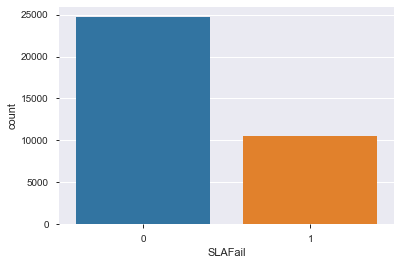

In [16]:
sns.countplot(x='SLAFail', data=df)

In [17]:
# 
df = df.drop(['TimeToResolve'], axis='columns')

## END and OUTPUT

In [18]:
with open("3.a.Detail_Incident.csv",'w') as f:
    df.to_csv(f, index=False)

In [19]:
df.reset_index(drop=True, inplace=True)
profile = ProfileReport(df, title="Profile of BPIC 2014 Detail_Incident Data after Adding SLAFail", html={'style': {'full_width': True}})

In [20]:
profile.to_file(Path(str("3.b.Detail_Incident_Profile.html")))